# Week 3 Assignment

#### Dataset
In this homework, we will continue the New York City Airbnb Open Data. You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv) or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv) if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.

#### Features
For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group',`
* `'room_type',`
* `'latitude',`
* `'longitude',`
* `'price',`
* `'minimum_nights',`
* `'number_of_reviews',`
* `'reviews_per_month',`
* `'calculated_host_listings_count',`
* `'availability_365'`

Select only them and fill in the missing values with 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns = ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 
           'price', 'minimum_nights', 'number_of_reviews', 
           'reviews_per_month', 'calculated_host_listings_count', 
           'availability_365']

In [3]:
data = pd.read_csv('data/AB_NYC_2019.csv', usecols=columns)
data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
data.isna().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
data.reviews_per_month.fillna(0, inplace=True)

## Question 1
What is the most frequent observation (mode) for the column `'neighbourhood_group'`?

In [6]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [7]:
data.neighbourhood_group.mode()

0    Manhattan
dtype: object

## Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train_full.shape, df_test.shape

((39116, 10), (9779, 10))

In [10]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
df_train.shape, df_val.shape

((29337, 10), (9779, 10))

In [11]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

del df_train['price']
del df_val['price']
del df_test['price']

## Question 2
* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [12]:
data.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


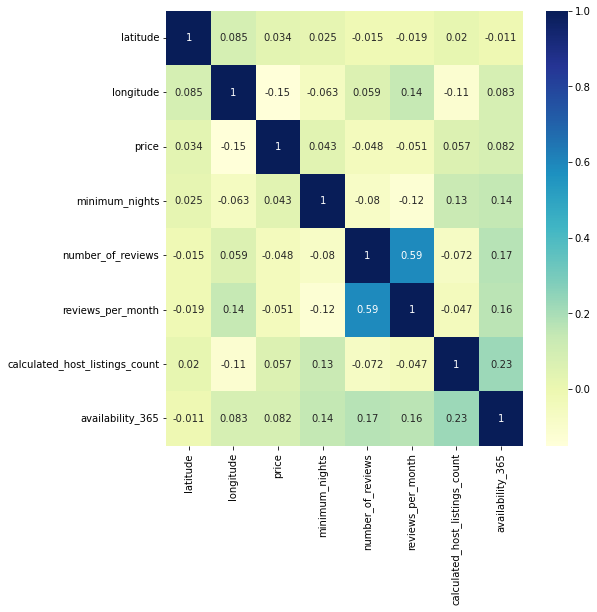

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

`'reviews_per_month'` & `'number_of_reviews'`

## Make price binary
* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.

In [14]:
mean = data.price.mean()
mean

152.7206871868289

In [15]:
df = data.copy()
mean = df.price.mean()

In [16]:
df['above_average'] = np.where(df['price'] > mean, 1, 0)

In [17]:
df = df.drop('price', axis=1)

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Question 3
* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
categorical = ['neighbourhood_group', 'room_type']

In [20]:
def mutual_info_vs_price(series):
    return mutual_info_score(series, df_train.above_average)

In [21]:
mut_info = df_train[categorical].apply(mutual_info_vs_price)
mut_info = mut_info.sort_values(ascending=False)
mut_info

room_type              0.143035
neighbourhood_group    0.046513
dtype: float64

## Question 4
* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [23]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [24]:
numerical = ['latitude', 'longitude', 'minimum_nights',
             'number_of_reviews', 'reviews_per_month', 
             'calculated_host_listings_count', 'availability_365']

In [25]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

In [26]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [27]:
X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

In [28]:
model = LogisticRegression(solver='lbfgs', 
                           C=1.0, 
                           random_state=42, 
                           max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.79


## Question 5
* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * `neighbourhood_group`
    * `room_type`
    * `number_of_reviews`
    * `reviews_per_month`
    
> note: the difference doesn't have to be positive

In [34]:
columns

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [35]:
features = ['neighbourhood_group', 'room_type', 'latitude', 
            'longitude', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count',
            'availability_365']

In [39]:
original_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    
    X_train = dv.transform(train_dict)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42,
                               max_iter=1000)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    print(c, original_score - score, score)

neighbourhood_group 0.03992330504141528 0.7500766949585848


C:\Users\ivdin\miniconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


room_type 0.061091113610798664 0.7289088863892014
latitude 0.0040300644237653005 0.7859699355762347
longitude 0.003825544534206027 0.786174455465794


C:\Users\ivdin\miniconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


minimum_nights 0.0002464464669189592 0.7897535535330811


C:\Users\ivdin\miniconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


number_of_reviews -0.0006738930360977724 0.7906738930360978
reviews_per_month -0.000264853256979225 0.7902648532569793
calculated_host_listings_count 0.0008600061355966693 0.7891399938644034
availability_365 0.009245321607526336 0.7807546783924737


## Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


If there are multiple options, select the smallest `alpha`.

In [41]:
data.price = np.log1p(data.price)
data.price

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

In [42]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [46]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [48]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [50]:
alpha = [0, 0.01, 0.1, 1, 10]

for a in alpha:
    model = Ridge(alpha=a, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, '-', round(score, 3))

0 - 0.497
0.01 - 0.497
0.1 - 0.497
1 - 0.497
10 - 0.498


C:\Users\ivdin\miniconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.56335e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
